# MODELIZACIÓN LOSS GIVEN DEFAULT

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split


from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = r'C:\Users\mcent\OneDrive\Escritorio\PROYECTOS ML\SCORING_DE_RIESGOS'

Nombres de los ficheros de datos.

In [3]:
nombre_fichero = 'df_lg'

Cargar los datos.

In [4]:
df_lg = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_fichero)

In [5]:
target = 'lg'

In [6]:
y_lg = df_lg[target]
x_lg = df_lg.drop(columns=target)

## MODELIZAR

### Reservar el dataset de validacion

In [10]:
train_x,val_x,train_y,val_y = train_test_split(x_lg,y_lg,test_size=0.3)

### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

Modificar para dejar solo los algoritmos que se quieran testar.

Modificar los parámetros.

In [11]:
pipe = Pipeline([('algoritmo',HistGradientBoostingRegressor())])

grid = [{'algoritmo': [Ridge()],
         'algoritmo__alpha':list(np.arange(0.1,1.1,0.1))},
       
        {'algoritmo': [HistGradientBoostingRegressor()],
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_iter': [50,100,200],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__min_samples_leaf': [100],
         'algoritmo__scoring': ['neg_mean_absolute_percentage_error'],
         'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]}
       ]

### Optimizar los hiper parámetros

####  Con grid search

In [12]:
grid_search = GridSearchCV(estimator= pipe, 
                            param_grid = grid, 
                            cv = 3, 
                            scoring = 'neg_mean_absolute_error',
                            verbose = 0,
                            n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__alpha,param_algoritmo__l2_regularization,param_algoritmo__learning_rate,param_algoritmo__max_depth,param_algoritmo__max_iter,param_algoritmo__min_samples_leaf,param_algoritmo__scoring,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
81,59.19,1.22,1.12,0.03,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.25,0.10,20,200,100,neg_mean_absolute_percentage_error,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.37,-0.38,-0.37,-0.37,0.00,1
78,56.87,0.38,1.11,0.02,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.25,0.10,10,200,100,neg_mean_absolute_percentage_error,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.37,-0.38,-0.37,-0.37,0.00,2
114,56.51,0.71,1.08,0.01,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.50,0.10,10,200,100,neg_mean_absolute_percentage_error,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.37,-0.38,-0.37,-0.38,0.00,3
153,55.94,3.06,1.11,0.04,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.75,0.10,20,200,100,neg_mean_absolute_percentage_error,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.37,-0.38,-0.37,-0.38,0.00,4
189,47.70,2.51,0.66,0.03,HistGradientBoostingRegressor(l2_regularizatio...,NaN,1,0.10,20,200,100,neg_mean_absolute_percentage_error,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.38,-0.38,-0.37,-0.38,0.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,3.73,0.09,0.20,0.00,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0,0.01,5,50,100,neg_mean_absolute_percentage_error,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.47,-0.48,-0.47,-0.48,0.00,186
118,4.31,0.03,0.26,0.01,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.75,0.01,5,50,100,neg_mean_absolute_percentage_error,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.47,-0.48,-0.47,-0.48,0.00,187
46,4.14,0.04,0.26,0.00,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.25,0.01,5,50,100,neg_mean_absolute_percentage_error,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.48,-0.48,-0.47,-0.48,0.00,188
82,4.25,0.10,0.26,0.00,HistGradientBoostingRegressor(l2_regularizatio...,NaN,0.50,0.01,5,50,100,neg_mean_absolute_percentage_error,{'algoritmo': HistGradientBoostingRegressor(l2...,-0.48,-0.48,-0.47,-0.48,0.00,189


In [14]:
modelo_lg = HistGradientBoostingRegressor(learning_rate=0.1,
                                           max_depth= 20, 
                                           max_iter=200, 
                                           l2_regularization=0.25, 
                                           min_samples_leaf=100, 
                                           scoring='neg_mean_absolute_percentage_error')

modelo_lg.fit(train_x, train_y)

HistGradientBoostingRegressor(l2_regularization=0.25, max_depth=20,
                              max_iter=200, min_samples_leaf=100,
                              scoring='neg_mean_absolute_percentage_error')

## EVALUAR

### Predecir sobre validación

In [15]:
pred = modelo_lg.predict(val_x)

In [16]:
pd.DataFrame(data = pred, columns = ['pred']).describe().T

,count,mean,std,min,25%,50%,75%,max
pred,37306.00,0.51,0.23,-0.16,0.33,0.52,0.68,1.20


**Los minimos los reemplazamos por 0 y máximos por 1**

In [17]:
pred = np.where(pred > 1, 1, pred)
pred = np.where(pred < 0, 0, pred)

In [18]:
pd.DataFrame(data = pred, columns = ['pred']).describe().T

,count,mean,std,min,25%,50%,75%,max
pred,37306.00,0.51,0.23,0.00,0.33,0.52,0.68,1.00


### Evaluar sobre validación

In [19]:
mean_absolute_error(val_y, pred)

0.3736869494941195

### Reporte del modelo

In [20]:
check_validacion = pd.DataFrame({'val_y':val_y, 'pred':pred})

In [21]:
check_validacion

,val_y,pred
id_cliente,,
99982592,0.87,0.60
126195718,0.00,0.66
132249621,1.00,0.83
56107984,0.00,0.56
137503657,0.00,0.58
...,...,...
131738208,1.00,0.65
122910123,1.00,0.65
66631644,0.00,0.28


In [22]:
check_validacion.corr()

,val_y,pred
val_y,1.00,0.52
pred,0.52,1.00


<AxesSubplot:ylabel='Density'>

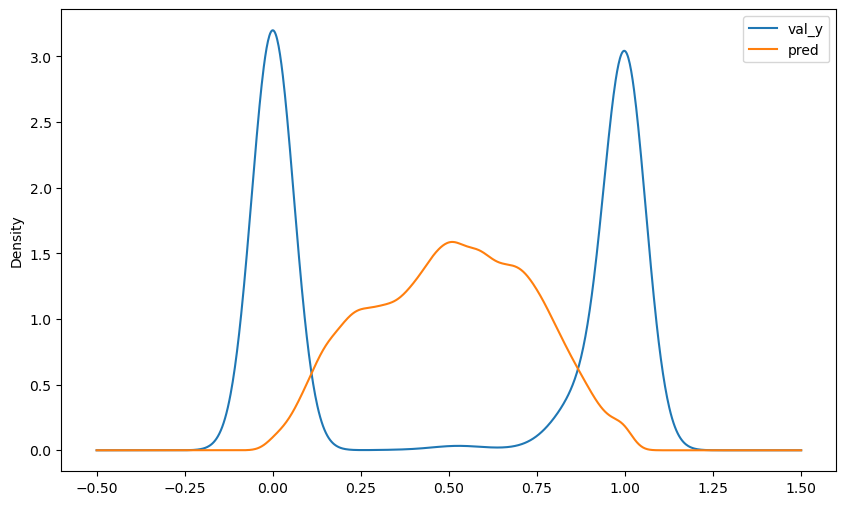

In [23]:
check_validacion.plot.density(figsize = (10,6))